In [22]:
import torch
import sklearn.metrics
import math
from math import log2
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance


# def KL(a, b):
#     a = np.asarray(a, dtype=np.float)
#     b = np.asarray(b, dtype=np.float)
#     return np.sum(np.where(a != 0, a * np.log(a / b), 0))

def total_variation(A, B):
    return 1/2* (sum(abs(a - b) for a, b in zip(A, B)))


m1 = "LeNet_Weights/Magnitude_Pruning_pruned.pt"
m2 = "LeNet_Weights/Magnitude_Pruning__Randomize_layerwise_pruned.pt"
m3 = "LeNet_Weights/Magnitude_Pruning__Reinit_pruned.pt"
m4 = "LeNet_Weights/Random_Pruning_pruned.pt"

model = torch.load(m1)
model2 = torch.load(m2)
model3 = torch.load(m3)
model4 = torch.load(m4)

layer_names = []
randomize_weights = []
reinit_weights = []
random_weights = []

print ("########## LENET Results ###########")
for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        layer_names.append(layer)
        res1 = torch.flatten(model[layer]) 
        res2 = torch.flatten(model2[layer])
        
        print ( m1[:-3], "AND", m2[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res2))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res2))
#         print ("KL Divergence: ", entropy(res1, qk=res2))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res2))
#         print ("Absolute difference: ", sum(res1-res2))
#         print ("Total Variation: ", total_variation(res1, res2))
        randomize_weights.append(wasserstein_distance(res1, res2))
        print ("\n")

for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        res1 = torch.flatten(model[layer]) 
        res3 = torch.flatten(model3[layer])
        
        print ( m1[:-3], "AND", m3[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res3))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res3))
#         print ("KL Divergence: ", entropy(res1, qk=res3))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res3))
#         print ("Absolute difference: ", sum(res1-res3))
#         print ("Total Variation: ", total_variation(res1, res2))
        reinit_weights.append(wasserstein_distance(res1, res3))
        print ("\n")

for layer in model.keys():
    if "weight" in layer and "mask" not in layer:
        res1 = torch.flatten(model[layer]) 
        res4 = torch.flatten(model4[layer])
        
        print ( m1[:-3], "AND", m4[:-3])
        print ("Layer: ", layer)
#         print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(res1, res4))
#         print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(res1, res4))
#         print ("KL Divergence: ", entropy(res1, qk=res4))
        print ("Wasserstein Distance:", wasserstein_distance(res1, res4))
#         print ("Absolute difference: ", sum(res1-res4))
#         print ("Total Variation: ", total_variation(res1, res4))
        random_weights.append(wasserstein_distance(res1, res4))
        print ("\n")




########## LENET Results ###########
LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Randomize_layerwise_pruned
Layer:  model.fc_layers.0.weight
Wasserstein Distance: 0.008437754294528955


LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Randomize_layerwise_pruned
Layer:  model.fc_layers.1.weight
Wasserstein Distance: 0.01509445669542693


LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Randomize_layerwise_pruned
Layer:  model.fc.weight
Wasserstein Distance: 0.020644118127644103


LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Reinit_pruned
Layer:  model.fc_layers.0.weight
Wasserstein Distance: 0.008495886973515988


LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Reinit_pruned
Layer:  model.fc_layers.1.weight
Wasserstein Distance: 0.014907305671936289


LeNet_Weights/Magnitude_Pruning_pruned AND LeNet_Weights/Magnitude_Pruning__Reinit_pruned
Laye

In [23]:
size = len(random_weights)

for i in range(len(random_weights)):
    randomize_layer = randomize_weights[i] 
    reinit = reinit_weights[i]
    random = random_weights[i]
    print (layer_names[i])
    print ("Randomize-Layerwise/Random Pruning: ", randomize_layer/random)
    print ("Reinit/Random Pruning: ", reinit/random)
    print ("\n")
    
    

model.fc_layers.0.weight
Randomize-Layerwise/Random Pruning:  1.1329672560667488
Reinit/Random Pruning:  1.1407729374721023


model.fc_layers.1.weight
Randomize-Layerwise/Random Pruning:  0.5022032173946143
Reinit/Random Pruning:  0.4959765708824433


model.fc.weight
Randomize-Layerwise/Random Pruning:  0.1884664762196349
Reinit/Random Pruning:  0.20421049647572553




In [26]:
import torch
import sklearn.metrics
import math
from math import log2
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance



m1 = "LeNet_Weights/Magnitude_Pruning_original.pt"
m2 = "LeNet_Weights/Magnitude_Pruning_pruned.pt"

model= torch.load(m1)
model2 = torch.load(m2)

print (model['fc_layers.0.weight'])
print ("#######\n")
print (model2['model.fc_layers.0.weight'])



tensor([[-0.1046, -0.0880, -0.0684,  ..., -0.0899,  0.0370,  0.0346],
        [ 0.0018,  0.0375,  0.0536,  ...,  0.0604, -0.0385,  0.0098],
        [ 0.0577, -0.0332,  0.0195,  ...,  0.0292, -0.0167, -0.0645],
        ...,
        [-0.0291, -0.0086, -0.0104,  ..., -0.0082,  0.0272,  0.0837],
        [-0.0022,  0.0950,  0.0913,  ..., -0.0131, -0.0150, -0.0239],
        [-0.0483,  0.0542,  0.0185,  ...,  0.0964,  0.0642,  0.0283]])
#######

tensor([[-0.1087, -0.0921, -0.0725,  ..., -0.0940,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.0707],
        ...,
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0726],
        [-0.0000,  0.0876,  0.0839,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ...,  0.1013,  0.0690, -0.0000]])


In [ ]:
# m1 = "LeNet_Weights/Magnitude_Pruning__Reinit_original.pt"
# m2 = "LeNet_Weights/Magnitude_Pruning__Reinit_pruned.pt"

# model = torch.load(m1)
# model2 = torch.load(m2)

# print (model['fc_layers.0.weight'])
# print ("#######\n")
# print (model2['model.fc_layers.0.weight'])



In [ ]:
# m1 = "LeNet_Weights/Magnitude_Pruning_pruned.pt"
# m2 = "LeNet_Weights/Magnitude_Pruning__Reinit_pruned.pt"
# m3 = "LeNet_Weights/Magnitude_Pruning__Randomize_layerwise_pruned.pt"

# model = torch.load(m1)
# model2 = torch.load(m2)
# model3 = torch.load(m3)

# res1 = torch.flatten(model[layer]) 
# res2 = torch.flatten(model2[layer])
# res3 = torch.flatten(model3[layer]) 

# print (model['model.fc_layers.1.weight'])
# print (np.round(sum(res1-res2).item(), 6))
# print ("#######\n")
# print (model2['model.fc_layers.1.weight'])
# print (np.round(sum(res1-res3).item(), 6))
# print ("#######\n")
# print (model3['model.fc_layers.1.weight'])

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = list(res1)
y = list(res2)
bins = np.linspace(-2, 2, 30)

plt.hist([x, y], bins, label=['Magnitude Pruning (Original)', 'Magnitude Pruning (Randomize)'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = list(res1)
y = list(res3)
bins = np.linspace(-2, 2, 30)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
from scipy.stats import wasserstein_distance

a = [0,1,3]
b = [3,1,0]

norm_a = [float(i)/sum(a) for i in a]
norm_b = [float(i)/sum(b) for i in b]


print ("Normalized Mutual Info Score:", sklearn.metrics.normalized_mutual_info_score(a, b))
print ("Mutual Info Score:", sklearn.metrics.mutual_info_score(a, b))
print ("KL Divergence: ", entropy(norm_a, qk=norm_b))
print ("Wasserstein Distance:", wasserstein_distance(a, b))


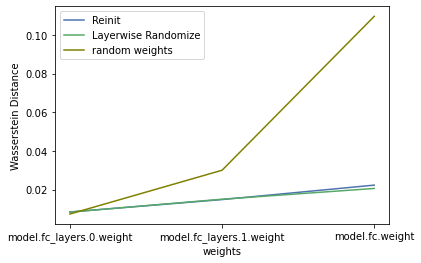

In [28]:

# layer_names = []
# randomize_weights = []
# reinit_weights = []
# random_weights = []

fig = plt.figure()
ax = plt.axes()
plt.xlabel("weights")
plt.ylabel("Wasserstein Distance")


ax.plot(layer_names, reinit_weights, label="Reinit");
ax.plot(layer_names, randomize_weights, label="Layerwise Randomize");
ax.plot(layer_names, random_weights, color='olive', label="random weights");
plt.legend()